In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

The main idea is that Deep Learning is usually a `directed acyclic graph` of layers.So the functional API is way to build the layers.

In [47]:
inputs = tf.keras.Input(shape=(784,))

In [48]:
img_shape.shape

TensorShape([None, 32, 32, 3])

In [49]:
x = tf.keras.layers.Dense(5, activation='relu', name='firstHiddenLayer')(inputs)

In [5]:
x.shape, x.name

(TensorShape([None, 32, 32, 5]), 'firstHiddenLayer/Relu:0')

In [50]:
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(10)(x)

In [51]:
model = tf.keras.Model(inputs=inputs, outputs=output, name='mnist_model')

In [52]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
firstHiddenLayer (Dense)     (None, 5)                 3925      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 4,959
Trainable params: 4,959
Non-trainable params: 0
_________________________________________________________________


In [53]:
tf.keras.utils.plot_model(model, "my_first_model.png", show_shapes=True )

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Training, evaluation, and inference

In [54]:
(X_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

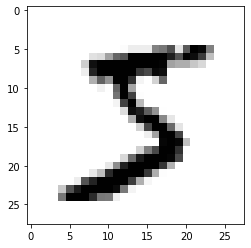

In [55]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [56]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [57]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.RMSprop(),
             metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 3s 2ms/step - loss: 1.1694 - accuracy: 0.6323 - val_loss: 0.4501 - val_accuracy: 0.8689
Epoch 2/2
750/750 [==============================] - 1s 2ms/step - loss: 0.4522 - accuracy: 0.8668 - val_loss: 0.3818 - val_accuracy: 0.8878


# Save and serialize


In [59]:
model.save('functionAP')
del model

INFO:tensorflow:Assets written to: functionAP/assets


In [60]:
model = tf.keras.models.load_model('functionAP')

In [61]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
firstHiddenLayer (Dense)     (None, 5)                 3925      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 4,959
Trainable params: 4,959
Non-trainable params: 0
_________________________________________________________________


# Use the same graph of layers to define multiple models

In the functional API, models are created by specifying their inputs and outputs in a graph of layers. That means that a single graph of layers can be used to generate multiple models.

In [64]:
encoder_input = tf.keras.layers.Input(shape=(28,28,1), name='img')
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(3)(x)
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(x)
x = tf.keras.layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = tf.keras.layers.GlobalMaxPooling2D()(x)

encoder = tf.keras.Model(inputs=encoder_input, outputs=encoder_output, name='encoder')
encoder.summary()

x = tf.keras.layers.Reshape((4, 4, 1))(encoder_output)
x = tf.keras.layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = tf.keras.layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = tf.keras.layers.UpSampling2D(3)(x)
x = tf.keras.layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = tf.keras.layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = tf.keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 16)                0   

In [71]:
def get_model():
    inputs = tf.keras.Input(shape=(128,))
    outputs = tf.keras.layers.Dense(1)(inputs)
    return tf.keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = tf.keras.layers.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = tf.keras.layers.average([y1, y2, y3])
ensemble_model = tf.keras.Model(inputs=inputs, outputs=outputs)

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'average')>